#Parte 0: Il Dataset

Il datataset trainMobile.csv (preso da kaggle -- https://www.kaggle.com/iabhishekofficial/mobileprice-classification) contiene dati relativi a telefoni cellulare, utilizzando le seguenti feature:

battery_power: Total energy a battery can store in one time measured in mAh
blue: Has bluetooth or not
clock_speed: speed at which microprocessor executes instructions
dual_sim: Has dual sim support or not
fc: Front Camera mega pixels
four_g: Has 4G or not
int_memory: Internal Memory in Gigabytes
m_dep: Mobile Depth in cm
mobile_wt: Weight of mobile phone
n_cores: Number of cores of processor
pc: Primary Camera mega pixels
px_height: Pixel Resolution Height
px_widthPixel Resolution Width
ram: Random Access Memory in Mega Bytes
sc_h: Screen Height of mobile in cm
sc_w: Screen Width of mobile in cm
talk_time: longest time that a single battery charge will last
three_g: Has 3G or not
touch_screen: Has touch screen or not
wifi: Has wifi or not
price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost)
and 3(very high cost).

**Il dataset è costituito da attributi con valori numerici. La variabile da predire è price_range.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/trainMobile.csv')

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


#Parte 1: Analisi 

##1
Quante sono le istanze contenute nel dataset? _______ Il dataset è completo (cioè per ogni
istanza tutti i valori di attributo sono sempre correttamente specificati – non esistono “missing
values”)? _______ Il dataset è bilanciato per quanto riguarda la classe da predire? _________
(punti 1).

In [ ]:
df.shape
#il dataset ha 2000 istanze e 20 features (la ventunesima è la classe da predire)

(2000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

il dataset sembra essere completo in quanto non compaiono valori NaN (non sappiamo però se si è usato altri valori per indicare NaN)

In [ ]:
df.groupby('price_range').size()

price_range
0    500
1    500
2    500
3    500
dtype: int64

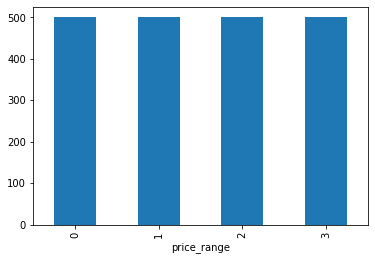

In [ ]:
df.groupby('price_range').size().plot.bar()

Il dataset è bilanciato secondo le classi da predirre. Abbiamo 4 classi da 500 istanze ciascuna

##2. La variabile sc_w assume valori discreti o continui? Analizzare la distribuzione dei valori e verificare se i telefoni costosi hanno mediamente una dimensione superiore di schermo.

In [ ]:
df['sc_w'].describe()

count    2000.000000
mean        5.767000
std         4.356398
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

In [ ]:
print(df['sc_w'].value_counts().index)
#la variabile sc_w assume valori discreti dall' 1 al 18

Int64Index([1, 3, 4, 0, 5, 2, 7, 6, 8, 10, 9, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64')


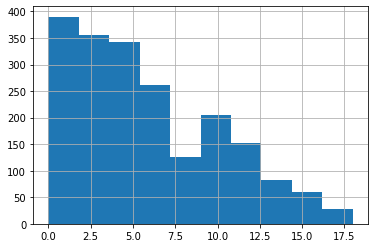

In [ ]:
df['sc_w'].hist()

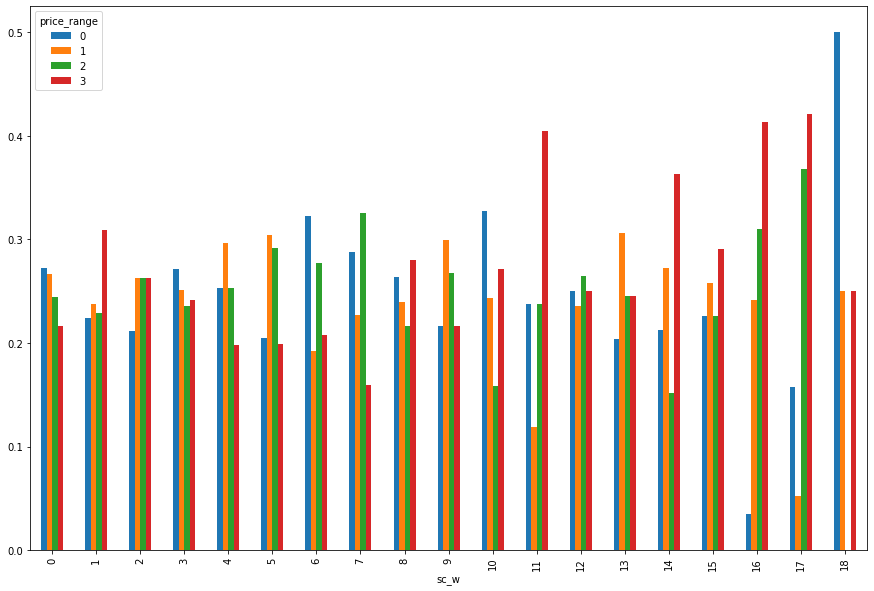

In [ ]:
(df.groupby(['sc_w','price_range']).size()/df.groupby(['sc_w']).size()).unstack().plot.bar(figsize= (15,10))

In [ ]:
df.groupby(['price_range']).mean()['sc_w']

price_range
0    5.682
1    5.544
2    5.714
3    6.128
Name: sc_w, dtype: float64

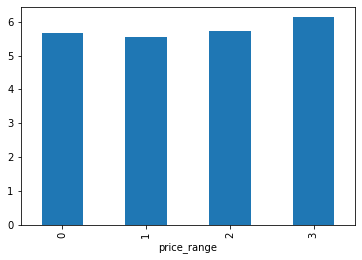

In [ ]:
df.groupby(['price_range']).mean()['sc_w'].plot(kind='bar')

C'è poca differenza (in media) nel costo tra telefoni di piccole e grandi dimensioni.
Solo l'ultima classe di telefoni più costosi presenta un dimensione media maggiore

##Verificare se eliminando gli elementi con sc_w uguale a 0 il risultato cambia. (punti 2)

In [ ]:
df_mod = df[df.sc_w > 0]
df_mod['sc_w'].unique()


array([ 7,  3,  2,  8,  1, 10,  9, 15, 13,  5, 11,  4, 12,  6, 17, 14, 16,
       18])

In [ ]:
df_mod.groupby(['price_range']).mean()['sc_w']

price_range
0    6.299335
1    6.132743
2    6.265351
3    6.646421
Name: sc_w, dtype: float64

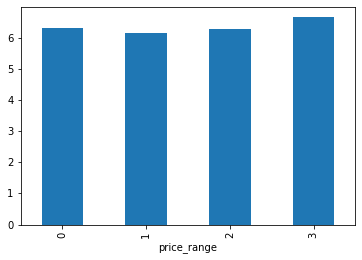

In [ ]:
df_mod.groupby(['price_range']).mean()['sc_w'].plot.bar()

Rimuovendo i valori nulli di sc_w le dimensioni medie sono aumentate ma non si notano grandi cambiamenti
Solo l'ultima classe di telefoni più costosi presenta un dimensione media maggiore

##3. E’ vero che mediamente i telefoni meno costosi hanno anche una batteria meno potente?
Realizzare 4 istogrammi (uno per ogni valore di price_range) che rappresentino la distribuzione
dei valori di battery power per ogni categoria. (punti 3)

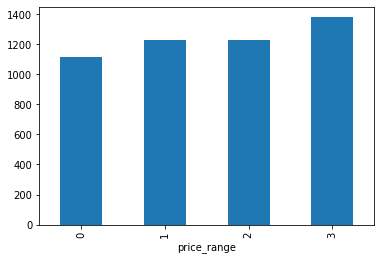

In [ ]:
df.groupby(['price_range']).mean()['battery_power'].plot(kind='bar')

Si nota che in media i telefoni più costosi tendono ad avere batterie più potenti mentre quelli economici meno potenti

In [ ]:
battery_by_prices = []
for i in df.price_range.values:
  battery_by_prices.append(df[df.price_range == i].battery_power)

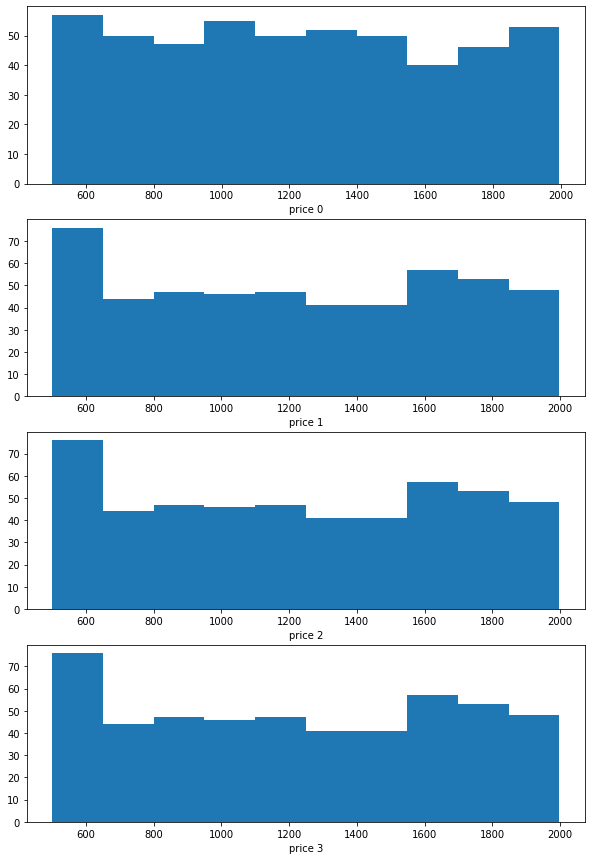

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,15)) #due axes, uno per ogni grafico
for i in range(4):
  axes[i].hist(battery_by_prices[i])
  axes[i].set_xlabel('price {}'.format(i) )

##4. Verificare se tutti i telefoni che hanno il 4G hanno anche il 3G (punti 2)

In [ ]:
df_4g = df[df['four_g'] == 1]
print("numero telefoni con 4G:", df_4g.shape[0])
print("numero telefoni con 4G e 3G:", df_4g[df_4g['three_g']==1].shape[0])

numero telefoni con 4G: 1043
numero telefoni con 4G e 3G: 1043


Tutti i telefoni che hanno il 4G hanno anche il 3G

##5. Quanti sono i telefoni 4G che non hanno wifi e bluetooth? (punti 2)

In [ ]:
df_4g[np.logical_and(df_4g['wifi'] == 0, df_4g['blue'] == 0)].shape[0]

263

#Parte 2: Trasformazione e Predizione



##Punto 1

Si vuole predire il valore di price_range sulla base degli attributi presenti nel dataset.
Dividere il dataset in modo che 3/4 degli elementi siano contenuti in un nuovo dataset “train” e
1/4 nel dataset “test”.
Allenare il train con il modello Decision Tree e valutare l’accuracy ottenuta calcolata sia sul
dataset train sia sul dataset test. Confrontare i risultati ottenuti con quelli ottenuti con una
predizione basata sul modello Logistic Regression. Effettuare alcune considerazioni sui risultati
ottenuti, tenendo in considerazione anche l’analisi della confusion matrix. (punti 4)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X = df.drop(columns='price_range')
y = df['price_range']

Test Set Results
Confusion Matrix:
 [[113  11   0   0]
 [  6  85  19   0]
 [  0  14  90  21]
 [  0   1  17 123]]


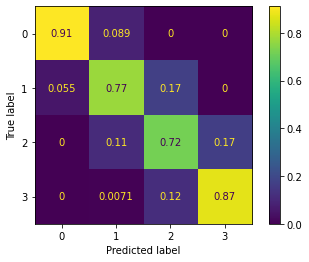


Accuracy: 0.822 

Train Set Results
Confusion Matrix:
 [[376   0   0   0]
 [  0 390   0   0]
 [  0   0 375   0]
 [  0   0   0 359]]


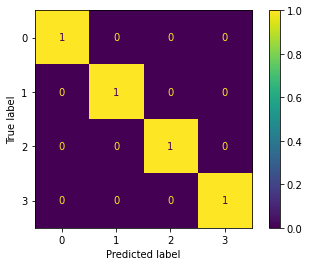


Accuracy: 1.0 



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=1/4, train_size=3/4 ,random_state=0)

model = DecisionTreeClassifier()

model.fit(X_train,y_train)


#matrice di confusione ed accuracy sul test set

predict = model.predict(X_test)

print("Test Set Results")
print("Confusion Matrix:\n", confusion_matrix(y_test, predict))
plot_confusion_matrix(model, X_test, y_test, normalize='true')
plt.show() 
print("\nAccuracy:", accuracy_score(y_test, predict),"\n")

#matrice di confusione ed accuracy sul train set

predict = model.predict(X_train)

print("Train Set Results")
print("Confusion Matrix:\n", confusion_matrix(y_train, predict))
plot_confusion_matrix(model, X_train, y_train, normalize='true')
plt.show() 
print("\nAccuracy:", accuracy_score(y_train, predict),"\n")

L'accuracy sul test set è dell' ottanta percento e la predizione corretta sulle classi (eccetto per la classe 2) è all'incirca all'80% 
Il modello ha score 100% su training set, indicando dell'overfitting elevato

Test Set Results
Confusion Matrix:
 [[104  18   2   0]
 [ 17  63  25   5]
 [  0  33  58  34]
 [  0   2  39 100]]


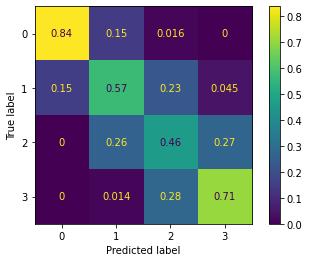


Accuracy: 0.65 

Train Set Results
Confusion Matrix:
 [[289  84   3   0]
 [ 66 215  89  20]
 [  1  84 179 111]
 [  0   2  91 266]]


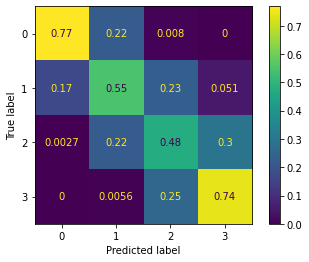


Accuracy: 0.6326666666666667 



In [ ]:
#CLASSIFICAZIONE CON LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=1/4, train_size=3/4 ,random_state=0)

model = LogisticRegression()

model.fit(X_train,y_train)


#matrice di confusione ed accuracy sul test set

predict = model.predict(X_test)

print("Test Set Results")
print("Confusion Matrix:\n", confusion_matrix(y_test, predict))
plot_confusion_matrix(model, X_test, y_test, normalize='true')
plt.show() 
print("\nAccuracy:", accuracy_score(y_test, predict),"\n")

#matrice di confusione ed accuracy sul train set

predict = model.predict(X_train)

print("Train Set Results")
print("Confusion Matrix:\n", confusion_matrix(y_train, predict))
plot_confusion_matrix(model, X_train, y_train, normalize='true')
plt.show() 
print("\nAccuracy:", accuracy_score(y_train, predict),"\n")

Il modello Logistic Regression ha un'accuracy più bassa sul train e test set rispetto il modello Decision Tree e ha peggiori performance sulla classi 1 e 2 del price range. Ma si nota che c'è molto meno overfitting in quanto gli score tra test e train con il modello Logist Regression sono simili.
Si potrebbe provare a rendere meno complesso il modello decision tree limitandone la profondità (impostando iperparametri diversi) così da evitare overfitting

##Punto 2
Confrontare l’accuratezza ottenuta nel punto precedente con l’accuratezza si ottiene con un
una 10 Fold cross validation. (punti 1)

In [ ]:
X = df.drop(columns='price_range')
y = df['price_range']

model = LogisticRegression()

cv_results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print("Results:\n",cv_results,"\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())

Results:
 [0.595 0.65  0.65  0.67  0.66  0.655 0.595 0.67  0.635 0.615] 
Mean Accuracy: 0.6395000000000001 
Accuracy STD:  0.027060118255469643


Lo score è di un punto percentuale maggiore rispetto l'accuracy ottenuta prima sul train set mentre è inferiore all'accuracy ottenuta prima con il test set (Logistic Regression)

##Punto 3.
Utilizzare la funzione di gridSearchCV per trovare i parametri migliori del classificatore
decision tree. Agire sui parametri criterion, max_features e min_samples_split. Vericare se
l’accuratezza che si ottiene con la nuova configurazione supera quella standard ottenuta al
punto 1 (punti 4)

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 5}

Grid scores on development set:

nan (+/-nan) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 1}
0.609 (+/-0.126) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2}
0.581 (+/-0.195) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 3}
0.612 (+/-0.150) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 4}
0.637 (+/-0.129) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 5}
nan (+/-nan) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 1}
0.645 (+/-0.112) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 2}
0.633 (+/-0.162) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 3}
0.605 (+/-0.160) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 4

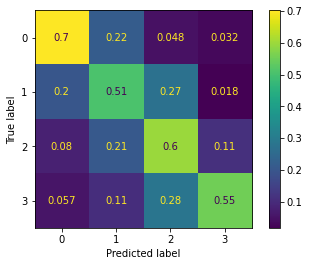

In [ ]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()
fold_num = 10

# Set the parameters by cross-validation
tuned_parameters = [{'criterion': ['gini', 'entropy'],
                     'max_features': ['auto', 'sqrt', 'log2'],
                     'min_samples_split': [1,2,3,4,5]
                     }]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(model, tuned_parameters, cv=fold_num,
                       scoring= score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    print("\nAccuracy:", accuracy_score(y_true, y_pred),"\n")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    plot_confusion_matrix(clf, X_test, y_true, normalize='true')
    plt.show()
  

L'accuracy ottenuta dal modello con il grid search è inferiore a quella standard


4. Utilizzare la funzione MaxAbsScaler per scalare i valori del dataset tra 0 e 1 e confrontare se
l’accuratezza ottenuta con il Decision Tree Classifier migliora (punti 3).

In [ ]:
X = df.drop(columns='price_range')
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=1/4, train_size=3/4 ,random_state=0)

Accuracy Score on test: 0.816


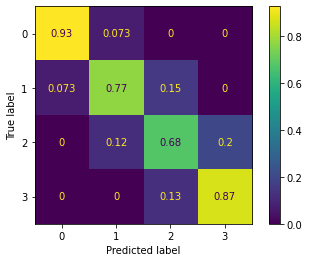

Accuracy Score on train: 1.0


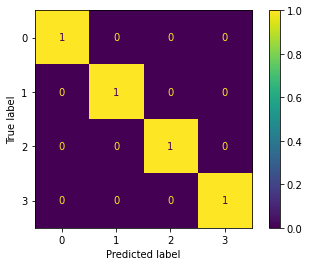

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline

scaler = MaxAbsScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

model = DecisionTreeClassifier()

model.fit(X_train_sc,y_train)
preds = model.predict(X_test_sc)

# Evaluate the model
score = accuracy_score(y_test,preds )
print('Accuracy Score on test:', score)
plot_confusion_matrix(model, X_test_sc, y_test, normalize='true')
plt.show() 

# Evaluate the model
preds = model.predict(X_train_sc)
score = accuracy_score(y_train, preds)
print('Accuracy Score on train:', score)
plot_confusion_matrix(model, X_train_sc, y_train, normalize='true')
plt.show() 

Le performance sono quasi identiche rispetto al modello allenato con il dataset non processato. C'è ancora overfitting in quanto le performance su train set e test set sono di molto differenti (in particolare quella sul test è del 100%)


##Punto 5
Discretizzare il valore di ram in 4 intervalli e verificare se l’accuratezza ottenuta con il
Decision Tree Classifier migliora (punti 2).


In [ ]:
dfr = df.copy()
dfr.ram.unique().sum()

3318953

In [ ]:
dfr['ram'] = pd.cut(dfr['ram'],bins=4, labels=[0,1,2,3])

In [ ]:
dfr.ram.value_counts()

2    505
3    502
1    502
0    491
Name: ram, dtype: int64

In [ ]:
Xr = dfr.drop(columns='price_range')
yr = dfr['price_range']

Test Set Results
Confusion Matrix:
 [[108  15   1   0]
 [ 12  79  19   0]
 [  0  21  79  25]
 [  0   0  27 114]]


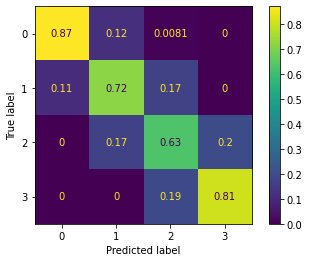


Accuracy: 0.76 

Train Set Results
Confusion Matrix:
 [[376   0   0   0]
 [  0 390   0   0]
 [  0   0 375   0]
 [  0   0   0 359]]


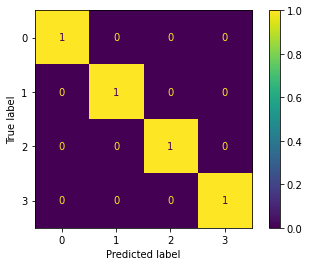


Accuracy: 1.0 



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xr, yr,test_size=1/4, train_size=3/4 ,random_state=0)

model = DecisionTreeClassifier()

model.fit(X_train,y_train)


#matrice di confusione ed accuracy sul test set

predict = model.predict(X_test)

print("Test Set Results")
print("Confusion Matrix:\n", confusion_matrix(y_test, predict))
plot_confusion_matrix(model, X_test, y_test, normalize='true')
plt.show() 
print("\nAccuracy:", accuracy_score(y_test, predict),"\n")

#matrice di confusione ed accuracy sul train set

predict = model.predict(X_train)

print("Train Set Results")
print("Confusion Matrix:\n", confusion_matrix(y_train, predict))
plot_confusion_matrix(model, X_train, y_train, normalize='true')
plt.show() 
print("\nAccuracy:", accuracy_score(y_train, predict),"\n")

Le performance sono peggiorate rispetto il modello di controllo che usa il dataset con valori numerici
In particolare resta overfitting del modello.
Le performance potrebbero migliorare aumentando il numero di bins per l'attributo ram

##Punto 6
Creare una pipeline in cui il valore di ram sia discretizzato in 4 intervalli, il valore di
battery_power sia discretizzato in 10 intervalli e poi il dataset venga ricondotto a valori
nell’intervallo (0,1) e normalizzato con la funzione Normalizer. Si applichi poi un modello
DecisionTree. (punti 4) [Alternativa (punti 2): non applicare la discretizzazione]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer,MaxAbsScaler, Normalizer

In [ ]:
untransformed_cols = []
for col in df.columns:
  if col not in ['ram', 'battery_power', 'price_range']:
    untransformed_cols.append(col)

col_transformers = ColumnTransformer(transformers=[('ram', KBinsDiscretizer(n_bins=4, encode='ordinal'), ['ram']),
                                                   ('batt_pw', KBinsDiscretizer(n_bins=10, encode='ordinal'), ['battery_power']),
                                                   ('others', 'passthrough', untransformed_cols)])

preprocessing = Pipeline(steps=[('col_transformers', col_transformers),
                                ('maxAbs', MaxAbsScaler()),
                                ('normalizer', Normalizer())])

model = DecisionTreeClassifier()

my_pipeline = Pipeline(steps=[('preprocessing', preprocessing),
                              ('model', model)])

X = df.drop(columns='price_range')
y = df['price_range']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/4,random_state=0)

my_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('col_transformers',
                                  ColumnTransformer(n_jobs=None,
                                                    remainder='drop',
                                                    sparse_threshold=0.3,
                                                    transformer_weights=None,
                                                    transformers=[('ram',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=4,
                                                                                    strategy='quantile'),
                                                                   ['ram']),
                                                                  ('batt_pw',
                                 

Test Set Results
Confusion Matrix:
 [[107  17   0   0]
 [ 19  66  22   3]
 [  0  29  71  25]
 [  0   3  24 114]]


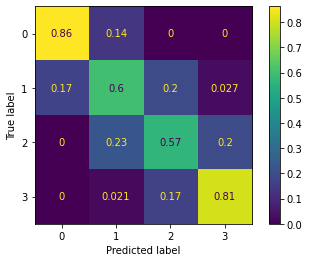


Accuracy: 0.716 

Train Set Results
Confusion Matrix:
 [[376   0   0   0]
 [  0 390   0   0]
 [  0   0 375   0]
 [  0   0   0 359]]


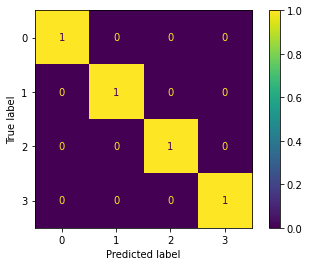


Accuracy: 1.0 



In [ ]:
#matrice di confusione ed accuracy sul test set

predict = my_pipeline.predict(X_test)

print("Test Set Results")
print("Confusion Matrix:\n", confusion_matrix(y_test, predict))
plot_confusion_matrix(my_pipeline, X_test, y_test, normalize='true')
plt.show() 
print("\nAccuracy:", accuracy_score(y_test, predict),"\n")

#matrice di confusione ed accuracy sul train set

predict = my_pipeline.predict(X_train)

print("Train Set Results")
print("Confusion Matrix:\n", confusion_matrix(y_train, predict))
plot_confusion_matrix(my_pipeline, X_train, y_train, normalize='true')
plt.show() 
print("\nAccuracy:", accuracy_score(y_train, predict),"\n")

Il modello usante la pipeline è peggiore rispetto a quello usante il dataset originale. E' ancora presente elevato overfitting data la discrepanza di performance tra train e test.
Le feature ram e battery power decrescono l'accuracy del modello se discretizzate.
La normalizzazione non influenza di molto il decision tree per la sua natura di classificatore ad albero decisionale

##Punto 7
Si verifichi l’accuratezza ottenuta con il file test.csv. Controllare le colonne del file. I risultati
corretti sono nel file class.csv. (punti 2).


In [ ]:
df_test = pd.read_csv('/content/testMobile.csv')

In [ ]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [ ]:
df_test.drop(columns='id', inplace=True)

In [ ]:
print(df.columns)
print(df_test.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


In [ ]:
df_class = pd.read_csv('/content/class.csv')
df_class

,Unnamed: 0,class
0,0,3
1,1,2
2,2,3
3,3,3
4,4,1
...,...,...
995,995,1
996,996,1
997,997,1
998,998,2


In [ ]:
df_class = df_class['class']

In [ ]:
X_testf = df_test
y_testf = df_class 

In [ ]:
X = df.drop(columns='price_range')
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=1/4, train_size=3/4 ,random_state=0)

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 4}

Grid scores on development set:

nan (+/-nan) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 1}
0.635 (+/-0.151) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2}
0.590 (+/-0.165) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 3}
0.670 (+/-0.105) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 4}
0.628 (+/-0.194) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 5}
nan (+/-nan) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 1}
0.582 (+/-0.139) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 2}
0.611 (+/-0.079) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 3}
0.640 (+/-0.148) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split'

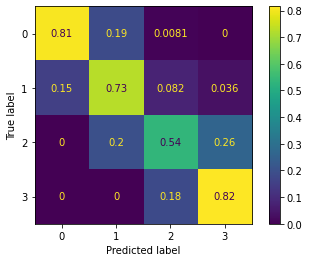

In [ ]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()
fold_num = 10

# Set the parameters by cross-validation
tuned_parameters = [{'criterion': ['gini', 'entropy'],
                     'max_features': ['auto', 'sqrt', 'log2'],
                     'min_samples_split': [1,2,3,4,5]
                     }]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(model, tuned_parameters, cv=fold_num,
                       scoring= score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    print("\nAccuracy:", accuracy_score(y_true, y_pred),"\n")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    plot_confusion_matrix(clf, X_test, y_true, normalize='true')
    plt.show()
  


Accuracy: 0.662 

Confusion Matrix:
 [[187  58   7   0]
 [ 69 146  37   3]
 [  4  38 149  71]
 [  0   6  45 180]]


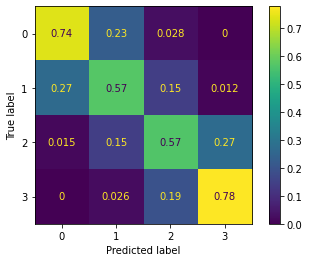

In [ ]:
X_testf = df_test
y_testf = df_class 

y_pred = clf.predict(X_testf)

print("\nAccuracy:", accuracy_score(y_testf, y_pred),"\n")
print("Confusion Matrix:\n", confusion_matrix(y_testf, y_pred))
plot_confusion_matrix(clf, X_testf, y_testf, normalize='true')
plt.show()

L'accuracy con i dati del test è inferiore rispetto a quella dei dati di validazione usata per il modello (split test del dataset usato per allenare con grid search il decision tree).
La predizione delle classi vista con la confusion matrix è però simile